<a href="https://colab.research.google.com/github/AliShujjat/DropOutRatesInPakistan/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu/Edu2.csv" "Edu2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from matplotlib import pyplot

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

In [3]:
df = pd.read_csv('Edu2.csv')

In [4]:
performance = {"Model":[], "Accuracy":[]};
auc_list = []

# Preprocessing

In [5]:
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Education Status of Child,Edu status,Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007
0,0,19,1.0,2,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0
1,1,19,3.0,0,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
2,2,19,3.0,0,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0
3,3,19,3.0,0,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0
4,4,19,3.0,0,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0


In [6]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Education Status of Child')) #Remove b from list
cols.pop(cols.index('Edu status')) #Remove x from list
df = df[cols+['Education Status of Child','Edu status']] #Create new dataframe with columns in the order you want
df.drop('Edu status', inplace=True, axis=1)
df["Education Status of Child"].replace({1: 2}, inplace=True)
df.head()

,Unnamed: 0,"If Drop-out, studied up-to which\nclass",Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007,Education Status of Child
0,0,19,2.0,3.0,5,1.0,40.0,5.0,1.0,36.0,6.0,4.0,-0.023974,5.0,1.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,2.0
1,1,19,2.0,5.0,5,4.0,35.0,3.0,3.0,30.0,6.0,2.0,0.706430,2.0,2.0,1.0,132,0,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0
2,2,19,2.0,5.0,5,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,1.0,132,0,0.0,4792.0,113,50.0,1977.0,128,54.0,0.0,3.0,2,2.0,3.0
3,3,19,2.0,10.0,5,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,1.0,4.0,3,2.0,3.0
4,4,19,2.0,4.0,5,1.0,40.0,5.0,20.0,30.0,6.0,3.0,-0.185241,3.0,2.0,0.0,132,1,1.0,4792.0,113,50.0,1977.0,128,54.0,0.0,2.0,0,2.0,3.0


In [7]:
len(df.columns)

30

In [8]:
df = df.values
X, y = df[:,0:28], df[:,29]

In [9]:
#Normalization
scaler = MinMaxScaler(feature_range=(0,1))
newX = scaler.fit_transform(X)
scaler.transform(newX)

display(newX)

#split into source and target
X, y = df[:,:-1], df[:,-1]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33)

array([[0.00000000e+00, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 3.33333333e-01, 0.00000000e+00],
       [3.84341911e-06, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 6.66666667e-01, 6.66666667e-01],
       [7.68683821e-06, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 6.66666667e-01, 6.66666667e-01],
       ...,
       [9.99992313e-01, 6.55172414e-01, 1.66666667e-01, ...,
        2.50000000e-01, 0.00000000e+00, 3.33333333e-01],
       [9.99996157e-01, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [1.00000000e+00, 6.55172414e-01, 1.66666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01]])

# Logistic Regression

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation metrics of logistic regression classifier:  0.8409657357154504
[[16781  7525]
 [ 6130 55426]]
              precision    recall  f1-score   support

         2.0       0.73      0.69      0.71     24306
         3.0       0.88      0.90      0.89     61556

    accuracy                           0.84     85862
   macro avg       0.81      0.80      0.80     85862
weighted avg       0.84      0.84      0.84     85862

Sensitivity:  0.6904056611536247
Specificity:  0.9004158814737799


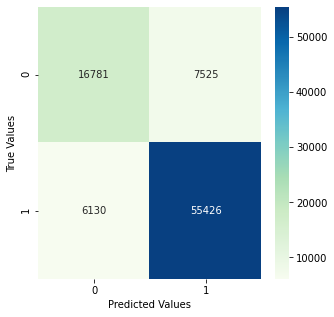

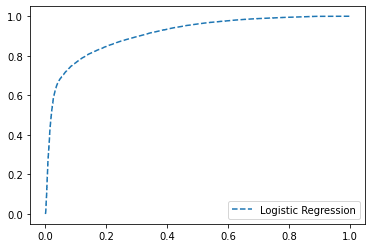

In [11]:
y_pred = logreg.predict(X_test)

#Evaluate
score = logreg.score(X_test, y_test)
print("Evaluation metrics of logistic regression classifier: ", score)
performance['Model'].append('Logistic Regression')
performance['Accuracy'].append(score)
conf_mat = confusion_matrix(y_test,y_pred)

print(conf_mat)
print(classification_report(y_test, y_pred))
sens = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
spec = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

print("Sensitivity: ", sens)
print("Specificity: ", spec)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

#ROC Plot
y_probs = logreg.predict_proba(X_test)
y_probs = y_probs[:, 1]
log_auc = roc_auc_score(y_test,y_probs)
auc_list.append(("Logistic Regression",log_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Logistic Regression')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Naive Bayes

Naive Bayes Classification Score: 0.7581700868836039
[[ 3545 20761]
 [    3 61553]]
              precision    recall  f1-score   support

         2.0       1.00      0.15      0.25     24306
         3.0       0.75      1.00      0.86     61556

    accuracy                           0.76     85862
   macro avg       0.87      0.57      0.56     85862
weighted avg       0.82      0.76      0.69     85862

Sensitivity:  0.14584876162264462
Specificity:  0.9999512638897914


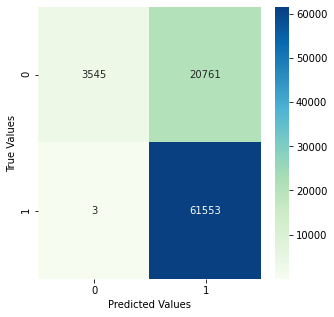

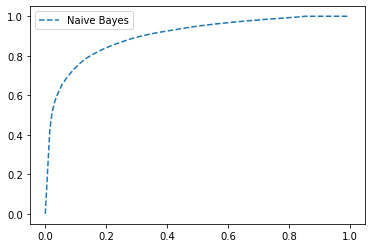

In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
score = naive_bayes.score(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(score))

performance['Model'].append('Naive Bayes')
performance['Accuracy'].append(score)

y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))
sens = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
spec = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

print("Sensitivity: ", sens)
print("Specificity: ", spec)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = naive_bayes.predict_proba(X_test)
y_probs = y_probs[:, 1]
log_auc = roc_auc_score(y_test,y_probs)
auc_list.append(("Naive Bayes",log_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive Bayes')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Decision Tree

Evaluation metrics of decision tree classifier:  0.9092031399222007
[[20504  3802]
 [ 3994 57562]]
              precision    recall  f1-score   support

         2.0       0.84      0.84      0.84     24306
         3.0       0.94      0.94      0.94     61556

    accuracy                           0.91     85862
   macro avg       0.89      0.89      0.89     85862
weighted avg       0.91      0.91      0.91     85862

Sensitivity:  0.843577717436024
Specificity:  0.9351159919422964


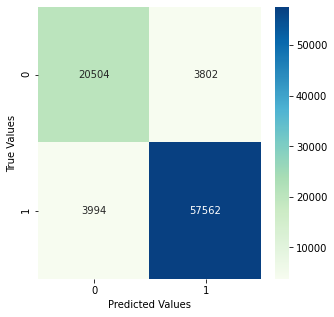

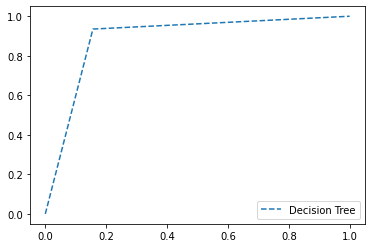

In [13]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
 
y_pred_new = dtc.predict(X_test)
score = dtc.score(X_test,y_test)
print("Evaluation metrics of decision tree classifier: ", score)
 
performance['Model'].append('Decision Tree')
performance['Accuracy'].append(score)

cm = confusion_matrix(y_test, y_pred_new)
print(cm)
print(classification_report(y_test, y_pred_new))
sens = cm[0,0] / (cm[0,0] + cm[0,1])
spec = cm[1,1] / (cm[1,0] + cm[1,1])

print("Sensitivity: ", sens)
print("Specificity: ", spec)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = dtc.predict_proba(X_test)
y_probs = y_probs[:, 1]
log_auc = roc_auc_score(y_test,y_probs)
auc_list.append(("Decision Tree",log_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Decision Tree')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# K-Nearest Neighbors

Score for Number of Neighbors = 5: 0.8985814446437307
[[19772  4534]
 [ 4174 57382]]
              precision    recall  f1-score   support

         2.0       0.83      0.81      0.82     24306
         3.0       0.93      0.93      0.93     61556

    accuracy                           0.90     85862
   macro avg       0.88      0.87      0.87     85862
weighted avg       0.90      0.90      0.90     85862

Sensitivity:  0.8134616967004032
Specificity:  0.9321918253297811


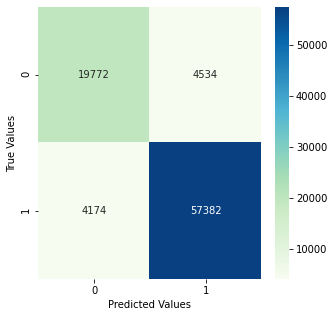

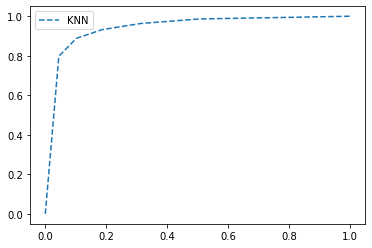

In [14]:


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

score = knn.score(X_test,y_test)
print("Score for Number of Neighbors = 5: {}".format(score))

performance['Model'].append('KNN')
performance['Accuracy'].append(score)

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))
sens = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
spec = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

print("Sensitivity: ", sens)
print("Specificity: ", spec)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

y_probs = knn.predict_proba(X_test)
y_probs = y_probs[:, 1]
log_auc = roc_auc_score(y_test,y_probs)
auc_list.append(("K-Nearest Neighbor",log_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='KNN')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Random Forest

Evaluation metrics of random forest classifier:  0.9392862966154993
[[21584  2722]
 [ 2491 59065]]
              precision    recall  f1-score   support

         2.0       0.90      0.89      0.89     24306
         3.0       0.96      0.96      0.96     61556

    accuracy                           0.94     85862
   macro avg       0.93      0.92      0.92     85862
weighted avg       0.94      0.94      0.94     85862

Sensitivity:  0.8880111906525138
Specificity:  0.9595327831568004


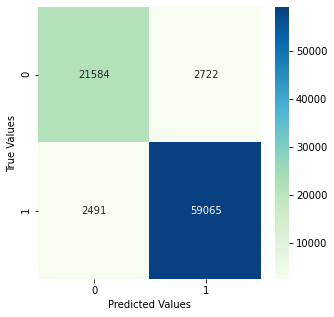

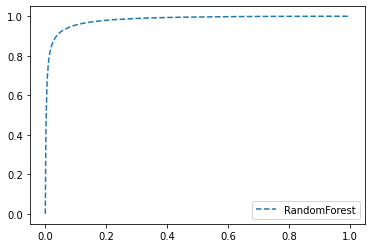

In [15]:
# Instantiate
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

# Import confusion_matrix
from sklearn import metrics

y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)

print("Evaluation metrics of random forest classifier: ", score)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(classification_report(y_test, y_pred))
sens = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
spec = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

print("Sensitivity: ", sens)
print("Specificity: ", spec)

#Visualizing Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,fmt=".0f",ax=ax, cmap=plt.cm.GnBu)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


performance['Model'].append('Random Forest')
performance['Accuracy'].append(score)



y_probs = clf.predict_proba(X_test)
y_probs = y_probs[:, 1]
log_auc = roc_auc_score(y_test,y_probs)
auc_list.append(("Random Forest",log_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs, pos_label=3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='RandomForest')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# Artificial Neural Network

In [16]:

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
performance['Model'].append('ANN')
performance['Accuracy'].append(mean)
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3784 - accuracy: 0.8209
Epoch 2/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3522 - accuracy: 0.8327
Epoch 3/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3484 - accuracy: 0.8331
Epoch 4/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3451 - accuracy: 0.8356
Epoch 5/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3426 - accuracy: 0.8361
Epoch 6/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3396 - accuracy: 0.8384
Epoch 7/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3372 - accuracy: 0.8396
Epoch 8/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3352 - accuracy: 0.8412
Epoch 9/10
3632/3632 [==============================] - 5s 1ms/step - loss: 0.3312 - accuracy: 0.8417
Epoch 10/10
1816/1816 [==============================] - 2s 945us/step - loss: 0.3

[('Logistic Regression', 0.9098061063951994), ('Naive Bayes', 0.9010725503977686), ('Decision Tree', 0.8893468546891603), ('K-Nearest Neighbor', 0.9417081336655309), ('Random Forest', 0.9809211856826845)]


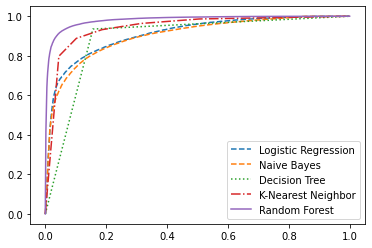

In [17]:
#Complete ROC

#Logistic Regression
y_probs_log = logreg.predict_proba(X_test)
y_probs_log = y_probs_log[:, 1]
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_probs_log, pos_label=3)

#Naive Bayes
y_probs_naive = naive_bayes.predict_proba(X_test)
y_probs_naive = y_probs_naive[:, 1]
ns_fpr_naive, ns_tpr_naive, _ = roc_curve(y_test, y_probs_naive, pos_label=3)

#Decision Tree
y_probs_tree = dtc.predict_proba(X_test)
y_probs_tree = y_probs_tree[:, 1]
ns_fpr_tree, ns_tpr_tree, _ = roc_curve(y_test, y_probs_tree, pos_label=3)

#K-Nearest Neighbor
y_probs_neighbor = knn.predict_proba(X_test)
y_probs_neighbor = y_probs_neighbor[:, 1]
ns_fpr_neighbor, ns_tpr_neighbor, _ = roc_curve(y_test, y_probs_neighbor, pos_label=3)

#Random Forest
y_probs_forest = clf.predict_proba(X_test)
y_probs_forest = y_probs_forest[:, 1]
ns_fpr_forest, ns_tpr_forest, _ = roc_curve(y_test, y_probs_forest, pos_label=3)

# Display area under curve list
print(auc_list)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Logistic Regression')
pyplot.plot(ns_fpr_naive, ns_tpr_naive, linestyle='dashed', label='Naive Bayes')
pyplot.plot(ns_fpr_tree, ns_tpr_tree, linestyle='dotted', label='Decision Tree')
pyplot.plot(ns_fpr_neighbor, ns_tpr_neighbor, linestyle='dashdot', label='K-Nearest Neighbor')
pyplot.plot(ns_fpr_forest, ns_tpr_forest, linestyle='solid', label='Random Forest')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

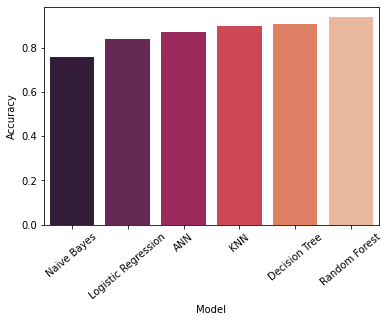

In [25]:
import seaborn as sns
dataFrame = pd.DataFrame(data=performance);

# Draw a vertical bar chart
sns.barplot(x=dataFrame['Model'],y=dataFrame['Accuracy'], data=dataFrame, order = dataFrame.sort_values('Accuracy').Model, palette='rocket')
plt.xticks(rotation=40)